# River discharge

In this tutorial we will simulate a fictitious radioactive tracer that is injected into the ocean by the 200 largest rivers (by estimated discharge).
The 200 major rivers dataset from [*Dai and Trenberth* (2002)](https://rda.ucar.edu/datasets/ds551.0/) is available from within the AIBECS.
Once "born", our ficitious tracer decays with a parameter timescale $\tau$ as it flows through ocean basins.

The 3D tracer equation is:

$$\left[\frac{\partial}{\partial t} + \nabla \cdot (\boldsymbol{u} + \mathbf{K}\nabla)\right] x = s_\mathsf{rivers} - x / \tau$$

where $\nabla \cdot \left[ \boldsymbol{u} - \mathbf{K} \nabla \right]$ represents the ocean circulation transport.
(Tracer transport operators are described in the documentation.)
The riverine source of the tracer is $s_\mathsf{rivers}$, and $x / \tau$ is the decay rate.

In AIBECS, we must recast this equation in the generic form

$$\left[\frac{\partial}{\partial t} + \mathbf{T}(\boldsymbol{p})\right] \boldsymbol{x} = \boldsymbol{G}(\boldsymbol{x},\boldsymbol{p}).$$

We start by telling Julia that we want to use the AIBECS and the OCIM2 transport matrix for the ocean circulation.

In [1]:
using AIBECS
grd, T_OCIM2 = OCIM2.load()

┌ Warning: Over-writing registration of the datadep
│   name = AIBECS-OCIM2_CTL_He
└ @ DataDeps /Users/runner/.julia/packages/DataDeps/ooWXe/src/registration.jl:15
┌ Info: You are about to use the OCIM2_CTL_He model.
│ If you use it for research, please cite:
│ 
│ - DeVries, T., & Holzer, M. (2019). Radiocarbon and helium isotope constraints on deep ocean ventilation and mantle‐³He sources. Journal of Geophysical Research: Oceans, 124, 3036–3057. https://doi.org/10.1029/2018JC014716
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Holzer_2019" key.)
└ @ AIBECS.OCIM2 /Users/runner/work/AIBECS.jl/AIBECS.jl/src/OCIM2.jl:113


(, 
  [1     ,      1]  =  0.000197784
  [2     ,      1]  =  2.34279e-9
  [10384 ,      1]  =  -1.95995e-7
  [10442 ,      1]  =  -0.000191612
  [10443 ,      1]  =  4.80961e-9
  [20825 ,      1]  =  -1.83059e-9
  [20883 ,      1]  =  5.00768e-9
  [1     ,      2]  =  -5.02516e-8
  [2     ,      2]  =  0.000187531
  ⋮
  [200160, 200159]  =  -2.19656e-8
  [197886, 200160]  =  1.08199e-10
  [199766, 200160]  =  6.70981e-9
  [199777, 200160]  =  -1.26352e-9
  [199778, 200160]  =  -3.39279e-9
  [199779, 200160]  =  7.59316e-9
  [199790, 200160]  =  -7.41018e-9
  [200156, 200160]  =  -3.44106e-8
  [200159, 200160]  =  -2.00303e-8
  [200160, 200160]  =  5.27945e-8, Quantity{Float64,𝐍 𝐋⁻³ 𝐓⁻¹,Unitful.FreeUnits{(m⁻³, mol, yr⁻¹),𝐍 𝐋⁻³ 𝐓⁻¹,nothing}}[1.82368935574118e-11 mol m⁻³ yr⁻¹, 1.9469772194929453e-11 mol m⁻³ yr⁻¹, 3.4879359939844136e-13 mol m⁻³ yr⁻¹, 1.5360041759458074e-12 mol m⁻³ yr⁻¹, 1.47673234957578e-12 mol m⁻³ yr⁻¹, 5.300237184679614e-11 mol m⁻³ yr⁻¹, 8.595855761423191e-11 mol m⁻³ yr

For the radioactive decay, we simply use

In [2]:
function decay(x, p)
    @unpack τ = p
    return x / τ
end

decay (generic function with 1 method)

To build the river sources, we will load the geographic locations and discharge (in m³ s⁻¹) from the [*Dai and Trenberth* (2017) dataset](https://rda.ucar.edu/datasets/ds551.0/index.html#!description).

In [3]:
RIVERS = Rivers.load()

┌ Info: You are about to use the Dai and Trenberth river discharge dataset.
│ If you use it for research, please cite:
│ 
│ - For the dataset itself: Dai, A. 2017. Dai and Trenberth Global River Flow and Continental Discharge Dataset. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. https://doi.org/10.5065/D6V69H1T.
│ - For the formal publication that describe the dataset: Dai, A., and K. E. Trenberth, 2002: Estimates of freshwater discharge from continents: Latitudinal and seasonal variations. J. Hydrometeorol., 3, 660–687.
│ - For descriptions of updates to the dataset:
│     - Dai, A., T. Qian, K. E. Trenberth, and J. D Milliman, 2009: Changes in continental freshwater discharge from 1948-2004. J. Climate, 22, 2773–2791.
│     - Dai, A., 2016: Historical and future changes in streamflow and continental runoff: A review, in Terrestrial Water Cycle and Climate Change: Natural and Human-Induced Impacts, Geophysical

200-element Array{AIBECS.Rivers.River{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}}},1}:
 Amazon (-2.0, -55.5) 210472 m³ s⁻¹
 Congo (-4.3, 15.3) 41448 m³ s⁻¹
 Orinoco (8.1, -63.6) 35776 m³ s⁻¹
 Changjiang (30.8, 117.6) 29914 m³ s⁻¹
 Brahmaputra (25.2, 89.7) 19900 m³ s⁻¹
 Mississippi (32.3, -90.9) 19330 m³ s⁻¹
 Yenisey (67.4, 86.5) 18981 m³ s⁻¹
 Paraná (-32.7, -60.7) 17999 m³ s⁻¹
 Lena (70.7, 127.4) 16826 m³ s⁻¹
 Mekong (15.1, 105.8) 16636 m³ s⁻¹
 ⋮
 Guadalquivir (37.5, -6.0) 105 m³ s⁻¹
 Yaqui (29.2, -109.5) 105 m³ s⁻¹
 Colorado-TX (29.3, -96.1) 82 m³ s⁻¹
 Rio Grande (25.9, -97.4) 48 m³ s⁻¹
 de Grey (-20.3, 119.2) 44 m³ s⁻¹
 Gascoyne (-24.8, 113.8) 22 m³ s⁻¹
 Avon (-31.8, 116.1) 22 m³ s⁻¹
 Fortescue (-21.3, 116.2) 10 m³ s⁻¹
 Murchison (-27.9, 114.5) 6 m³ s⁻¹

This is an array of rivers, for which the type `River{T}` contains the river's name, lat–lon coordinates, and discharge in m³ s⁻¹.
For example, the first river is the Amazon

In [4]:
r = RIVERS[1]

Amazon (-2.0, -55.5) 210472 m³ s⁻¹

We can check the locations with

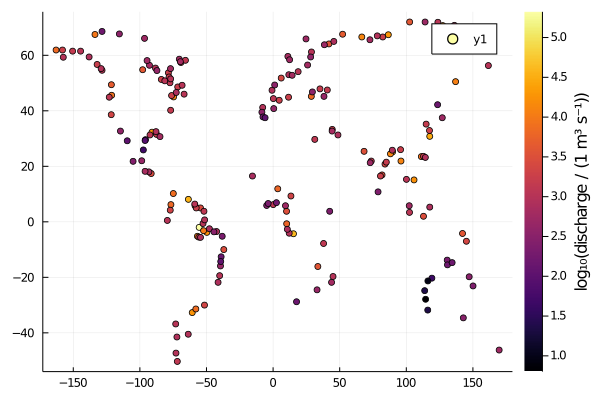

In [5]:
using Plots
scatter([r.lon for r in RIVERS], [r.lat for r in RIVERS],
        zcolor=log10.(uconvert.(NoUnits, [r.VFR for r in RIVERS] / u"m^3/s")),
        colorbartitle="log₁₀(discharge / (1 m³ s⁻¹))")

We can regrid these into the OCIM2 grid and return the corresponding vector with

In [6]:
rivers = regrid(RIVERS, grd)

200160-element Array{Quantity{Float64,𝐋³ 𝐓⁻¹,Unitful.FreeUnits{(m³, s⁻¹),𝐋³ 𝐓⁻¹,nothing}},1}:
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
          ⋮
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹
 0.0 m³ s⁻¹

(Note this regridding uses [NearestNeighbors.jl](https://github.com/KristofferC/NearestNeighbors.jl) to assign a wet box as the mouth of each river, which sometimes is not exactly the real location of the river mouth.)

We control the global magnitude of the river discharge, $\sigma$ (in mol s⁻¹), by making it a parameter of our model.
For that, we separate the river source

$$s_\mathsf{rivers} = \sigma s_0$$

into global magnitude ($\sigma$) and spatial pattern ($s_0$).

Since $\int s_0 \mathrm{d}V = 1$, `s_0` can be computed by normalizing `rivers`.
In Julia/AIBECS, this can be done by dividing `rivers` by the dot product `v ⋅ rivers` (or `v'rivers` in matrix form).
(`v ⋅ x` is the discrete equivalent of the volume integral $\int x \mathrm{d}V$.)

In [7]:
v = vector_of_volumes(grd)
s_0 = rivers / (v'rivers)
function s_rivers(p)
    @unpack σ = p
    return σ * ustrip.(s_0) # we must remove the units in AIBECS here :(
end

s_rivers (generic function with 1 method)

We then write the generic $\boldsymbol{G}$ function, which is

In [8]:
G_radiorivers(x,p) = s_rivers(p) - decay(x,p)

G_radiorivers (generic function with 1 method)

##### Parameters

We specify some initial values for the parameters and also include units.

In [9]:
import AIBECS: @units, units
import AIBECS: @initial_value, initial_value
@initial_value @units struct RadioRiversParameters{U} <: AbstractParameters{U}
    τ::U | 5.0 | u"yr"
    σ::U | 1.0 | u"Gmol/yr"
end

initial_value (generic function with 29 methods)

Finally, thanks to the initial values we provided, we can instantiate the parameter vector succinctly as

In [10]:
p = RadioRiversParameters()

 Row │ Symbol  Value    Initial value  Unit
     │ Symbol  Float64  Float64        FreeUnit…
─────┼───────────────────────────────────────────
   1 │ τ           5.0            5.0  yr
   2 │ σ           1.0            1.0  Gmol yr⁻¹

We generate the state function `F` and its Jacobian `∇ₓF`,

In [11]:
F, ∇ₓF = F_and_∇ₓF(T_OCIM2, G_radiorivers)

(AIBECS.var"#F#84"{SciMLBase.ODEFunction{false,AIBECS.var"#f#73"{Tuple{AIBECS.var"#51#52"{SparseMatrixCSC{Float64,Int64}}},Array{Int64,1},AIBECS.var"#tracer#70"{Int64,Int64},AIBECS.var"#G#71"{Tuple{typeof(Main.##319.G_radiorivers)},AIBECS.var"#tracers#69"{Int64,Int64}}},LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,AIBECS.var"#jac#78"{AIBECS.var"#∇ₓG#74"{Tuple{typeof(Main.##319.G_radiorivers)},Int64,Int64},AIBECS.var"#T#75"{Tuple{AIBECS.var"#51#52"{SparseMatrixCSC{Float64,Int64}}},Int64,Array{Int64,1}}},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}}(SciMLBase.ODEFunction{false,AIBECS.var"#f#73"{Tuple{AIBECS.var"#51#52"{SparseMatrixCSC{Float64,Int64}}},Array{Int64,1},AIBECS.var"#tracer#70"{Int64,Int64},AIBECS.var"#G#71"{Tuple{typeof(Main.##319.G_radiorivers)},AIBECS.var"#tracers#69"{Int64,Int64}}},LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,AIBECS.var"#jac#78"{AIBECS.var"#∇ₓG#74"{Tuple{typeof(Main.##319.G_

generate the steady-state problem `prob`,

In [12]:
nb = sum(iswet(grd))
x = ones(nb) # initial guess
prob = SteadyStateProblem(F, ∇ₓF, x, p)

SteadyStateProblem with uType Array{Float64,1}. In-place: false
u0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

and solve it

In [13]:
s = solve(prob, CTKAlg()).u * u"mol/m^3"

200160-element Array{Quantity{Float64,𝐍 𝐋⁻³,Unitful.FreeUnits{(m⁻³, mol),𝐍 𝐋⁻³,nothing}},1}:
 -3.5978320678545035e-12 mol m⁻³
  -5.353871365614471e-12 mol m⁻³
  -6.483485194145423e-12 mol m⁻³
  -7.823908119438112e-12 mol m⁻³
  -9.790442371142639e-12 mol m⁻³
  -9.770934123554965e-12 mol m⁻³
 -2.4448173185327692e-11 mol m⁻³
  -6.738392003831876e-11 mol m⁻³
  -6.510837450817274e-11 mol m⁻³
  -7.890402312088845e-11 mol m⁻³
                               ⋮
  -3.876074162661802e-13 mol m⁻³
 -1.3409356343223215e-13 mol m⁻³
  -7.257906578905157e-13 mol m⁻³
  -6.182255119626685e-13 mol m⁻³
 -3.4001872611691927e-13 mol m⁻³
   6.192396794418706e-13 mol m⁻³
  -5.257895087043604e-13 mol m⁻³
  -6.838780987222712e-13 mol m⁻³
 -4.2788166690498217e-13 mol m⁻³

Let's now run some visualizations using the plot recipes.
Taking a horizontal slice of the 3D field at 200m gives

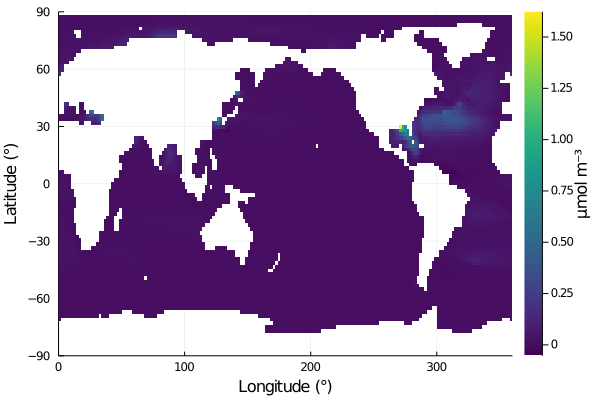

In [14]:
cmap = :viridis
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=200, color=cmap)

and at 500m:

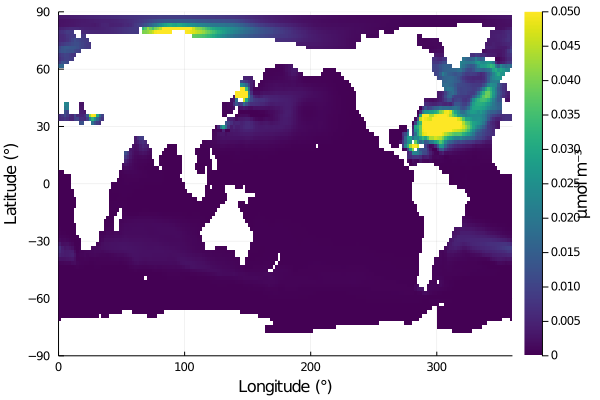

In [15]:
plothorizontalslice(s, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,0.05))

Or we can change the timescale and watch the tracer fill the oceans:

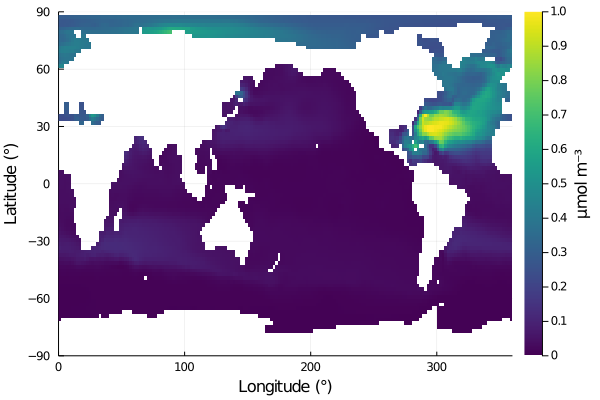

In [16]:
p = RadioRiversParameters(τ = 50.0u"yr")
prob = SteadyStateProblem(F, ∇ₓF, x, p)
s_τ50 = solve(prob, CTKAlg()).u * u"mol/m^3"
plothorizontalslice(s_τ50, grd, zunit=u"μmol/m^3", depth=500, color=cmap, clim=(0,1))

Point-wise sources like the rivers used here can be problematic numerically because these
can generate large gradients and numerical noise with the given spatial discretization:

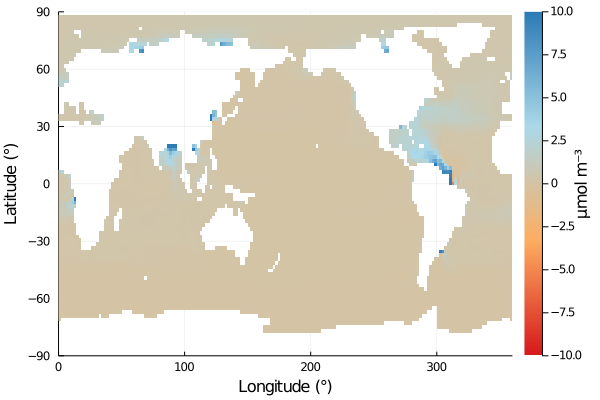

In [17]:
cmap = :RdYlBu_4
plothorizontalslice(s_τ50, grd, zunit=u"μmol/m^3", depth=0, color=cmap, clim=(-10,10))

Note, for an example of numerical noise, the negative values appearing in red.
Hence, it might be wise to smooth the 3D field of the river sources.
We can do this using the `smooth_operator` function
(`smooth_operator` creates an operator that can be applied to smooth the AIBECS vector
along the stencil of the given transport matrix and in a volume-conservative way).
And we can check that the negative values disappear after smoothing of the sources:

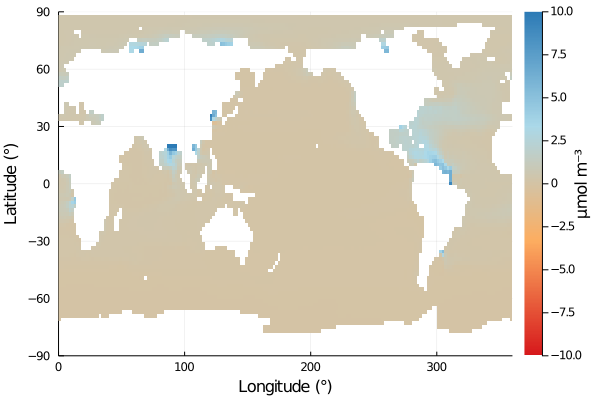

In [18]:
S = smooth_operator(grd, T_OCIM2)
s_0 = S * (S * s_0) # smooth river sources twice
s_smooth = solve(prob, CTKAlg()).u * u"mol/m^3"
plothorizontalslice(s_smooth, grd, zunit=u"μmol/m^3", depth=0, color=cmap, clim=(-10,10))

Note that such numerical noise generally dampens out with distance and depth

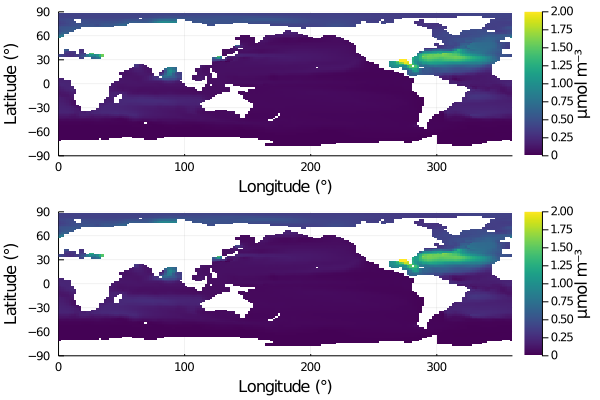

In [19]:
cmap = :viridis
plot(
    plothorizontalslice(s_τ50, grd, zunit=u"μmol/m^3", depth=200, color=cmap, clim=(0,2)),
    plothorizontalslice(s_smooth, grd, zunit=u"μmol/m^3", depth=200, color=cmap, clim=(0,2)),
    layout=(2,1)
)

Nevertheless, it is always good to reduce noise as much as possible!

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*